## Intall packages

In [1]:
#install local packages:
%pip install kaggle
%pip install jupyter 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import packages:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt
import re
from kaggle.api.kaggle_api_extended import KaggleApi

sns.set()

## Load Dataset

In [5]:
# Kaggle API credentials:
api = KaggleApi()
api.authenticate()

#define dataset name and download path:
dataset_name = 'rajugc/imdb-movies-dataset-based-on-genre'
download_path = '/Users/zdycho/Desktop/BDP_BI/CSVs_kaggle'

#download the dataset through the Kaggle API:
api.dataset_download_files(dataset_name, path=download_path, unzip=True)



#validate the downloaded files:
for filename in os.listdir(download_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(download_path, filename)
        # Read the CSV file
        df = pd.read_csv(file_path)
        print(f"Data from {filename}:")
        print(df.head())

Data from crime.csv:
     movie_id         movie_name  year certificate  runtime  \
0   tt5433140             Fast X  2023         NaN      NaN   
1  tt11564570        Glass Onion  2022       PG-13  139 min   
2  tt10365998      Infinity Pool  2023           R  117 min   
3  tt14138650  The Pale Blue Eye  2022           R  128 min   
4  tt15789492           Infiesto  2023       TV-MA   96 min   

                    genre  rating  \
0  Action, Crime, Mystery     NaN   
1    Comedy, Crime, Drama     7.2   
2  Crime, Horror, Mystery     6.5   
3  Crime, Horror, Mystery     6.6   
4  Crime, Drama, Thriller     5.5   

                                         description            director  \
0  Dom Toretto and his family are targeted by the...     Louis Leterrier   
1  Famed Southern detective Benoit Blanc travels ...        Rian Johnson   
2  James and Em Foster are enjoying an all-inclus...  Brandon Cronenberg   
3  A world-weary detective is hired to investigat...        Scott Cooper 

In [6]:
#set the path to the downloaded files:
base_path = '/Users/zdycho/Desktop/BDP_BI/CSVs_kaggle'

#load the downloaded files:
action_movie = pd.read_csv(base_path + '/action.csv')
crime_movie = pd.read_csv(base_path + '/crime.csv')
adventure_movie = pd.read_csv(base_path + '/adventure.csv')
thriller_movie = pd.read_csv(base_path + '/thriller.csv')
family_movie = pd.read_csv(base_path + '/family.csv')
mystery_movie = pd.read_csv(base_path + '/mystery.csv')
scifi_movie = pd.read_csv(base_path + '/scifi.csv')
history_movie = pd.read_csv(base_path + '/history.csv')
sport_movie = pd.read_csv(base_path + '/sports.csv')
animation_movie = pd.read_csv(base_path + '/animation.csv')
war_movie = pd.read_csv(base_path + '/war.csv')
biography_movie = pd.read_csv(base_path + '/biography.csv')
horror_movie = pd.read_csv(base_path + '/horror.csv')
fantasy_movie = pd.read_csv(base_path + '/fantasy.csv')
romance_movie = pd.read_csv(base_path + '/romance.csv')
film_noir_movie = pd.read_csv(base_path + '/film-noir.csv')


In [7]:
#add genre column to each dataframe:
action_movie['primary_genre'] = 'Action'
crime_movie['primary_genre'] = 'Crime'
adventure_movie['primary_genre'] = 'Adventure'
thriller_movie['primary_genre'] = 'Thriller'
family_movie['primary_genre'] = 'Family'
mystery_movie['primary_genre'] = 'Mystery'
scifi_movie['primary_genre'] = 'Sci-Fi'
history_movie['primary_genre'] = 'History'
sport_movie['primary_genre'] = 'Sport'
animation_movie['primary_genre'] = 'Animation'
war_movie['primary_genre'] = 'War'
biography_movie['primary_genre'] = 'Biography'
horror_movie['primary_genre'] = 'Horror'
fantasy_movie['primary_genre'] = 'Fantasy'
romance_movie['primary_genre'] = 'Romance'
film_noir_movie['primary_genre'] = 'Film-Noir'

In [8]:
#concatenate all dataframes:
df = pd.concat([action_movie, crime_movie, adventure_movie, thriller_movie,
                family_movie, mystery_movie, scifi_movie, history_movie,
                sport_movie, animation_movie, war_movie, biography_movie,
                horror_movie, fantasy_movie, romance_movie, film_noir_movie])

#reset index:
df = df.reset_index(drop=True)

#preview the dataframe:
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN,Action
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN,Action
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN,Action
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368295,tt0032257,Black Diamonds,1940,NaN,60 min,"Crime, Drama, Film-Noir",5.5,A reporter on a visit to his hometown hears of...,Christy Cabanne,/name/nm0127511/,"Richard Arlen, \nAndy Devine, \nKathryn Adams,...","/name/nm0035159/,/name/nm0222596/,/name/nm0011...",33.0,NaN,Film-Noir
368296,tt0027668,The Gentleman from Louisiana,1936,NaN,67 min,"Crime, Drama, Film-Noir",4.5,"In Victorian-era USA, a horse-jockey becomes a...",Irving Pichel,/name/nm0681635/,"Eddie Quillan, \nCharles 'Chic' Sale, \nCharlo...","/name/nm0703600/,/name/nm0757925/,/name/nm0377...",21.0,NaN,Film-Noir
368297,tt0047929,El cerco,1955,NaN,77 min,"Crime, Film-Noir",6.2,A group of robbers assault a factory in the po...,Miguel Iglesias,/name/nm0407071/,"José Guardiola, \nIsabel de Castro, \nÁngel Jo...","/name/nm0345348/,/name/nm0207894/,/name/nm0430...",46.0,NaN,Film-Noir
368298,tt0033161,Three Silent Men,1940,NaN,72 min,"Crime, Drama, Film-Noir",5.0,Foreign scientist is selling a secret weapon t...,Thomas Bentley,/name/nm0072872/,"Sebastian Shaw, \nDerrick De Marney, \nPatrici...","/name/nm0789970/,/name/nm0210116/,/name/nm0733...",79.0,NaN,Film-Noir


## Delete duplicates in movie_id

In [9]:
#print n of duplicates in columns "movie_id" and "movie_name":
print("Number of duplicates in 'movie_id' column: ", df.duplicated(subset=['movie_id']).sum())
print("Number of duplicates in 'movie_name' column: ", df.duplicated(subset=['movie_name']).sum())

Number of duplicates in 'movie_id' column:  125103
Number of duplicates in 'movie_name' column:  154442


In [10]:
#delete duplicates in movie_id and not movie_name (since two movies can have the same name):
df.drop_duplicates(subset=['movie_id'], inplace=True)

## Format columns and delete NaN values

In [14]:
#change "genre" column to "secondary_genre":
df.rename(columns = {'genre':'secondary_genre'}, inplace = True)

In [15]:
#delete "genre" from "secondary_genre" column

#create function:
def remove_primary_genre(row):
    primary_genre = row['primary_genre']
    secondary_genres = row['secondary_genre']

    #check if primary_genre is in the secondary_genres
    if primary_genre in secondary_genres:
        #replace primary genre and any adjacent commas
        #use strip to remove leading/trailing whitespace and commas
        new_secondary = secondary_genres.replace(primary_genre, '').replace(',,', ',').strip(', ')
    else:
        new_secondary = secondary_genres

    return new_secondary

#apply the function to each row:
df['secondary_genre'] = df.apply(remove_primary_genre, axis=1)


In [13]:
#merge "primary_genre" and "secondary_genre" into one column, with a comma in between:
df['genre'] = df['primary_genre'] + ', ' + df['secondary_genre']

/var/folders/y4/02h4n9j56l93mcnt118qjs2r0000gn/T/ipykernel_3238/3639465928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['primary_genre'] + ', ' + df['secondary_genre']


In [14]:
#delete "primary_genre" and "secondary_genre" columns:
df.drop(['primary_genre', 'secondary_genre'], axis=1, inplace=True)

/var/folders/y4/02h4n9j56l93mcnt118qjs2r0000gn/T/ipykernel_3238/1693685110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['primary_genre', 'secondary_genre'], axis=1, inplace=True)


In [15]:
#print n of NaN in "gross(in $)" column:
print("Number of NaN in 'gross(in $)' column: ", df['gross(in $)'].isna().sum())

Number of NaN in 'gross(in $)' column:  0


In [12]:
##even though the n of NaN in "gross(in $)" column is high, we will still delete them since they are not useful for our analysis

#delete NaN values from "gross(in $)" column: 
df = df[df['gross(in $)'].notna()]


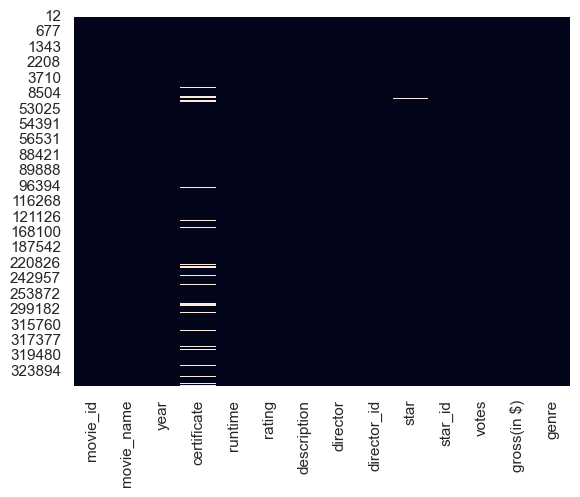

movie_id         0
movie_name       0
year             0
certificate    660
runtime          9
rating           0
description      0
director         1
director_id      1
star             4
star_id          1
votes            0
gross(in $)      0
genre            0
dtype: int64


In [16]:
#inspect columns for NaN values through a heatmap:
sns.heatmap(df.isna(), cbar=False)
plt.show()

#print values:
nan_counts = df.isna().sum()
print(nan_counts)

In [17]:
#print a list of rows that have NaN value in "certificate", and sort it in descending order based on "gross(in $)" column:
df[df['certificate'].isna()].sort_values(by='gross(in $)', ascending=False)



,movie_id,movie_name,year,certificate,runtime,rating,description,director,director_id,star,star_id,votes,gross(in $),genre
93712,tt0163862,T-Rex: Back to the Cretaceous,1998,NaN,45 min,4.8,A youth who finds a dinosaur egg accidentally ...,Brett Leonard,/name/nm0502577/,"Peter Horton, \nLiz Stauber, \nKari Coleman, \...","/name/nm0005022/,/name/nm0005459/,/name/nm0171...",778.0,53346750.0,"Adventure, Family, Fantasy"
229396,tt0079510,The Main Event,1979,NaN,112 min,5.5,A bankrupt entrepreneur attempts to recoup som...,Howard Zieff,/name/nm0956052/,"Barbra Streisand, \nRyan O'Neal, \nPaul Sand, ...","/name/nm0000659/,/name/nm0641939/,/name/nm0761...",3005.0,42800000.0,"Sports, Comedy, Romance, Sport"
229294,tt0078227,Semi-Tough,1977,NaN,108 min,5.9,A three-way friendship between two free-spirit...,Michael Ritchie,/name/nm0006916/,"Burt Reynolds, \nKris Kristofferson, \nJill Cl...","/name/nm0000608/,/name/nm0001434/,/name/nm0001...",3203.0,37187139.0,"Sports, Comedy, Romance, Sport"
229173,tt0092214,Wildcats,1986,NaN,106 min,6.0,A rookie high school football coach has a hard...,Michael Ritchie,/name/nm0006916/,"Goldie Hawn, \nSwoosie Kurtz, \nRobyn Lively, ...","/name/nm0000443/,/name/nm0001436/,/name/nm0001...",14045.0,26285544.0,"Sports, Comedy, Sport"
229177,tt0102517,Necessary Roughness,1991,NaN,108 min,6.2,"Due to NCAA sanctions, the Texas State Univers...",Stan Dragoti,/name/nm0236769/,"Scott Bakula, \nHector Elizondo, \nRobert Logg...","/name/nm0000836/,/name/nm0001185/,/name/nm0005...",12423.0,26255594.0,"Sports, Comedy, Sport"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70109,tt6079832,The Dirty Kind,2018,NaN,85 min,6.1,An inexperienced private investigator accident...,Vilan Trub,/name/nm2826538/,"Duke Williams, \nJohn Mertens, \nEd Glynn, \nM...","/name/nm6583286/,/name/nm8337859/,/name/nm7846...",87.0,115.0,"Crime, Drama, Thriller"
282603,tt2190469,True Love Zombie,2012,NaN,86 min,4.4,"Rhonda and Paul are a loving married couple, b...",Paul Blevins,/name/nm4860140/,"Paul Blevins, \nRhonda Blevins, \nSteve Snyder...","/name/nm4860140/,/name/nm4860569/,/name/nm4860...",46.0,100.0,"Horror, Comedy, , Romance"
230899,tt1748280,Veer!,2012,NaN,87 min,7.7,Jesse Sorensen ruled Florida as a pro skateboa...,Patrick Barry,/name/nm2741686/,"Jesse Gay, \nErin Cline, \nJames Nguyen, \nCor...","/name/nm4204320/,/name/nm1599810/,/name/nm3099...",80.0,85.0,"Sports, Comedy, Drama, Romance"
289735,tt13238490,Tee em el,2020,NaN,102 min,4.7,"'TEE EM EL' is about 'warfare, the kingdom of ...",Pereko Mosia,/name/nm11855913/,"Siyabonga Mabaso, \nLuyanda Mabote, \nReithole...","/name/nm11975421/,/name/nm11975436/,/name/nm11...",10.0,20.0,"Horror,"


In [18]:
#assign sum of "gross(in $) where columns have NaN values: 
cer_nan_sum_of_gross = df.loc[df['certificate'].isna(), 'gross(in $)'].sum()
run_nan_sum_of_gross = df.loc[df['runtime'].isna(), 'gross(in $)'].sum()
dir_nan_sum_of_gross = df.loc[df['director'].isna(), 'gross(in $)'].sum() #NaN match with "director_id"
sta_nan_sum_of_gross = df.loc[df['star'].isna(), 'gross(in $)'].sum() #NaN match with "star_id"

In [19]:
#divide cer_nan_sum_of_gross, run_nan_sum_of_gross, dir_nan_sum_of_gross, sta_nan_sum_of_gross with total sum of gross (in $):
total_gross = df['gross(in $)'].sum()

nan_gross_percent = ((
    cer_nan_sum_of_gross + 
    run_nan_sum_of_gross + 
    dir_nan_sum_of_gross + 
    sta_nan_sum_of_gross)/ 
    total_gross) 

print(f"Percentage of gross (in $) for NaN values: {nan_gross_percent:.2%}")

Percentage of gross (in $) for NaN values: 0.28%


In [20]:
##Because the remaining NaN values make up a small portion of the movie gross, we can safely drop these rows.

#delete NaN values from columns "certificate", "runtime", "director", "star": 
df = df.dropna(subset=['certificate', 'runtime', 'director', 'star'])

### Column: Movie Name

In [22]:
#define regular expression pattern to match non-alphanumeric characters:
pattern = r'[^a-zA-Z0-9\s]'

#check for non-alphanumeric characters in movie_name column:
non_alphanumeric = df['movie_name'].str.contains(pattern)

#print any rows with non-alphanumeric characters in movie_name column:
print(df[non_alphanumeric])

##validated that the sample of movies was correct when compaed to other movie websites


          movie_id                                         movie_name  year  \
28       tt0120737  The Lord of the Rings: The Fellowship of the Ring  2001   
35      tt10872600                            Spider-Man: No Way Home  2021   
39       tt4154796                                  Avengers: Endgame  2019   
48       tt5433138                                  F9: The Fast Saga  2021   
57       tt0446029                        Scott Pilgrim vs. the World  2010   
...            ...                                                ...   ...   
338338   tt3596382                                       Love & Taxes  2015   
338460   tt0111752                             The Wooden Man's Bride  1994   
341305   tt0323874                                        Sam & Janet  2002   
341486   tt0478213                            A New Day in Old Sana'a  2005   
351706   tt0330080                                      Le grand rôle  2004   

       certificate  runtime  rating  \
28          

### Column: Year

In [23]:
#check type of year: 
df['year'].dtype

dtype('O')

In [24]:
#change type of year to int:
df['year'] = pd.to_numeric(df['year'], errors='coerce')


In [26]:
#delete movies that are older than 1850:
current_year = pd.Timestamp.now().year
df = df[df['year'].between(1850, current_year)]

### Column: Certificate

In [27]:
#print full list of certificates: 
df['certificate'].unique()

##validated, and they are all correct

array(['PG-13', 'PG', 'R', 'TV-MA', 'Not Rated', '18+', 'Approved', '13+',
       'G', 'M/PG', 'Passed', 'TV-14', 'GP', 'M', 'TV-PG', 'Unrated',
       'TV-Y7', 'NC-17', 'X', 'TV-G', 'U', 'UA', '13', 'A', 'UA 7+', 'AO'],
      dtype=object)

### Column: Genre

In [28]:
#print full list of primary_genre:: 
df['genre'].unique()

##validated manually, and they are all correct

array(['Action, Adventure, Sci-Fi', 'Action, Drama',
       'Action, Adventure, Fantasy', 'Action, Adventure, Drama',
       'Action, Crime, Drama', 'Action, Crime, Thriller',
       'Action, Comedy, Crime', 'Action, Drama, Mystery',
       'Action, Sci-Fi', 'Action, Adventure', 'Action, Comedy, Fantasy',
       'Action, Adventure, Thriller', 'Action, Sci-Fi, Thriller',
       'Action, Adventure, Comedy', 'Action, Drama, History',
       'Action, Comedy, Sci-Fi', 'Action, Biography, Drama',
       'Action, Thriller', 'Action, Drama, War', 'Action, Crime, Horror',
       'Action, Drama, Sci-Fi', 'Action, Comedy, Thriller',
       'Action, Animation, , Adventure', 'Action, Adventure, Family',
       'Action, Drama, Thriller', 'Action, Comedy',
       'Action, Comedy, Horror', 'Action, Crime, Sci-Fi',
       'Action, Adventure, Mystery', 'Action, Drama, Sport',
       'Action, Mystery, Sci-Fi', 'Action, Mystery, Thriller',
       'Action, Crime, Mystery', 'Action, Adventure, Horror',
    

### Column: Description

In [29]:
#print 5 random descriptions from "description" column:
df['description'].sample(5)

#validated manually, and they are all correct

333497    Adam Lewis finds himself unexpectedly stood up...
253684    Biography of songwriter and Broadway pioneer, ...
116150    When a cop who is just out of rehab takes the ...
114015    A couple travels to Northern Europe to visit a...
93872     A hypochondriac vacations in the tropics for t...
Name: description, dtype: object

### Column: Director

In [33]:
#print 5 random names from "director" column:
df['director'].sample(5)

#validated manually, and they are all correct

4926                                            Cody Knotts
167761                                      Patricia Riggen
116609                                            Jon Watts
262376    Rupert Julian, \nLon Chaney, \nErnst Laemmle, ...
315768                                   Nicholas Jasenovec
Name: director, dtype: object

In [34]:
#check for missing values:
print("Number of missing values in 'director' column: ", df['director'].isna().sum())

#check for duplicates:
print("Number of duplicates in 'director' column: ", df['director'].duplicated().sum())


Number of missing values in 'director' column:  0
Number of duplicates in 'director' column:  5944


### Column: Star 

In [37]:
#inspect "star":
shortest_star = df.loc[df['star'].str.len().idxmin(), 'star']
longest_star = df.loc[df['star'].str.len().idxmax(), 'star']
print(shortest_star)
print(longest_star)
print(df['star'].str.len().max())


John Kerry
Dariel Arrechaga, 
Anailín de la Rúa de la Torre, 
Javier Núñez Florián, 
María Adelaida Méndez Bonet
101


In [1]:
#add a "actor_count" column:
df['actor_count'] = df['star'].str.split(',').apply(len)

NameError: name 'df' is not defined

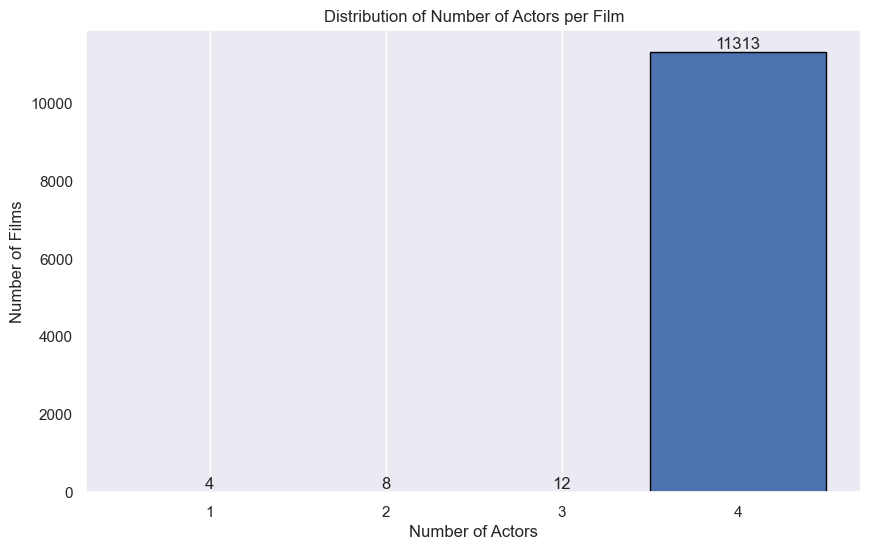

In [39]:
#print histogram for distribution of "star" column:
plt.figure(figsize=(10, 6))
ax = df['actor_count'].plot(kind='hist', bins=range(1, df['actor_count'].max() + 2), edgecolor='black', align='left')
plt.title('Distribution of Number of Actors per Film')
plt.xlabel('Number of Actors')
plt.ylabel('Number of Films')
plt.xticks(range(1, df['actor_count'].max() + 1))
plt.grid(axis='y')
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

In [40]:
#print the sum of "gross (in $)" for rows with "actor_count" of 1, 2, and 3:
print(df.loc[df['actor_count'].isin([1, 2, 3]), 'gross(in $)'].sum())

76996629.0


In [41]:
#print the full list of movies with "actor_count" of 1, 2 and 3:
df.loc[df['actor_count'].isin([1, 2, 3])].sort_values(by='gross(in $)', ascending=False)


,movie_id,movie_name,year,certificate,runtime,rating,description,director,star,star_id,votes,gross(in $),genre,actor_count
52785,tt4218572,Widows,2018,R,129 min,6.8,Four women with nothing in common except a debt left behind by their dead husbands' criminal activities take fate into their own hands and conspire to forge a future on their own terms.,Steve McQueen,"Viola Davis, \nMichelle Rodriguez, \nElizabeth Debicki","/name/nm0205626/,/name/nm0735442/,/name/nm4456120/",99698.0,42402632.0,"Crime, Drama, Thriller",3
254591,tt0073053,"Give 'em Hell, Harry!",1975,PG,104 min,7.4,One-man show about the presidency of Harry S. Truman.,"Steve Binder, \nPeter H. Hunt",James Whitmore,"/name/nm0402596/,/name/nm0926235/",533.0,11000000.0,"Biography, Comedy, Drama",1
1588,tt2017038,All Is Lost,2013,PG-13,106 min,6.9,"After a collision with a shipping container at sea, a resourceful sailor finds himself, despite all efforts to the contrary, staring his mortality in the face.",J.C. Chandor,Robert Redford,/name/nm0000602/,81460.0,6263670.0,"Action, Adventure, Drama",1
234615,tt2401878,Anomalisa,2015,R,90 min,7.2,A man crippled by the mundanity of his life experiences something out of the ordinary.,"Duke Johnson, \nCharlie Kaufman","David Thewlis, \nJennifer Jason Leigh, \nTom Noonan","/name/nm0442109/,/name/nm0000667/,/name/nm0000492/,/name/nm0006888/",73045.0,3759286.0,"Animation, Comedy, Drama",3
22555,tt7935892,The Oscar Nominated Short Films 2018: Live Action,2018,R,96 min,8.0,Collective screening of the Academy Award nominated short films from the Live Action category for 2018.,Max Porter,"Kobe Bryant, \nTarra Riggs","/name/nm1101483/,/name/nm2743985/",209.0,3508777.0,"Action, Drama",2
97723,tt0068318,Brother of the Wind,1972,G,88 min,7.6,"A mountain man saves four wolf cubs after their mother dies. They all bond to form a unique pack filled with friendship and ultimately, protection.",Dick Robinson,"Leon Ames, \nDick Robinson","/name/nm0000748/,/name/nm0732555/",92.0,3328507.0,"Adventure,",2
88338,tt6820256,Arctic,2018,PG-13,98 min,6.8,A man stranded in the Arctic after a plane crash must decide whether to remain in the relative safety of his makeshift camp or to embark on a deadly trek through the unknown.,Joe Penna,"Mads Mikkelsen, \nMaria Thelma Smáradóttir, \nTintrinai Thikhasuk","/name/nm0586568/,/name/nm5386550/,/name/nm10443784/",54313.0,2410795.0,"Adventure, Drama",3
1395,tt4218696,The Wall,2017,R,88 min,6.2,"Two American Soldiers are trapped by a lethal sniper, with only an unsteady wall between them.",Doug Liman,"Aaron Taylor-Johnson, \nJohn Cena, \nLaith Nakli","/name/nm1093951/,/name/nm1078479/,/name/nm1821298/",28111.0,1803064.0,"Action, Drama, Thriller",3
236343,tt6246170,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,2016,Not Rated,134 min,8.5,A profound and courageous story on how Guru Grace changed Banda Singh Bahadur in and out and enabled him to lead Sikh army to Punjab province to establish righteousness and equality in the ... See full summary »,Harry Baweja,"Harman Baweja, \nPawan Kalra, \nOm Puri","/name/nm2102514/,/name/nm10637201/,/name/nm0700875/",801.0,694280.0,"Animation,",3
114428,tt0870984,Antichrist,2009,Not Rated,108 min,6.5,"A grieving couple retreat to their cabin in the woods, hoping to repair their broken hearts and troubled marriage, but nature takes its course and things go from bad to worse.",Lars von Trier,"Willem Dafoe, \nCharlotte Gainsbourg, \nStorm Acheche Sahlstrøm","/name/nm0000353/,/name/nm0001250/,/name/nm3527143/",129239.0,397070.0,"Thriller, Drama, Horror",3


In [42]:
#delete rows with "actor_count" of 1, 2 and 3 to remove outliers:
df = df.loc[~df['actor_count'].isin([1, 2, 3])]

In [2]:
#print sample of "star" column and their movies: 
df['star'].sample(15)

##validated manually, and they are all correct

NameError: name 'df' is not defined

### Column: Star ID

### Column: Rating  

In [44]:
#inspect type of "rating" column:
df['rating'].dtype

dtype('float64')

In [45]:
#validate that all ratings are within range of 0-10:
df['rating'].between(0, 10).all()

True

In [ ]:
##PRINT DISTRIBUTION (APPLIES TO MORE COLUMNS) FOR RATING:


### Column: Runtime

In [46]:
#inspect type of "runtime" column:
df['runtime'].dtype

dtype('O')

In [47]:
#print sample of "runtime" column:
df['runtime'].sample(5)

55611     106 min
128059     95 min
326785     77 min
90204      80 min
322097    107 min
Name: runtime, dtype: object

In [48]:
#delete " min" from "runtime" column:
df['runtime'] = df['runtime'].str.replace(' min', '')

In [49]:
#convert "runtime" column to int:
df['runtime'] = df['runtime'].astype(int)

In [50]:
#validate that all runtimes are within range of 0-300:
df['runtime'].between(0,1000).all()

True

In [52]:
##PRINT DISTRIBUTION (APPLIES TO MORE COLUMNS) FOR RUNTIME:

### Column: Votes

In [51]:
#inspect type of "votes" column:
df['votes'].dtype

dtype('float64')

In [52]:
#check if all decimals are 0 for "votes" column:
df['votes'].apply(lambda x: x.is_integer()).all()

True

In [53]:
#convert "votes" column to int:
df['votes'] = df['votes'].astype(int)

### Column: Gross(in $)

In [54]:
#inpect type of "gross(in $)" column:
df['gross(in $)'].dtype

dtype('float64')

In [55]:
#validate that all gross values are within range of 0-7500000000:
df['gross(in $)'].between(0, 7500000000).all()

True

In [65]:
#delete redundant columns:

#delete "director_id" column:
df = df.drop(columns=['director_id'])

#drop "actor_count" column:
df = df.drop(columns='actor_count')

#drop "star_id" column:
df = df.drop(columns='star_id')

KeyError: "['actor_count'] not found in axis"

In [66]:
#print types of all columns:
df.dtypes

movie_id        string
movie_name      string
year             int64
certificate     string
runtime          int64
rating         float64
description     string
director        string
star            string
votes            int64
gross(in $)    float64
genre           string
dtype: object

In [58]:
#convert columns that are object to string:
df['movie_id'] = df['movie_id'].astype("string")
df['movie_name'] = df['movie_name'].astype("string")
df['certificate'] = df['certificate'].astype("string")
df['genre'] = df['genre'].astype("string")
df['description'] = df['description'].astype("string")
df['director'] = df['director'].astype("string")
df['star'] = df['star'].astype("string")


In [70]:
#print types of all columns:
df.dtypes

movie_id        string
movie_name      string
year             int64
certificate     string
runtime          int64
rating         float64
description     string
director        string
actor           string
votes            int64
gross_usd      float64
genre           string
dtype: object

In [67]:
#rename "star" column to "actor":
df.rename(columns = {'star':'actor'}, inplace = True)

In [69]:
#rename "gross(in $)" to "gross_usd":
df.rename(columns = {'gross(in $)':'gross_usd'}, inplace = True)

In [71]:
#download df as csv file:
df.to_csv('df.csv', index=False)